# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Output
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PowderyMildew
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PowderyMildew
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PowderyMildew
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YellowVeinMosaic
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YellowVeinMosaic


In [3]:
# to display stats about data
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.090909,0.045455,0.045455,0.090909,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455,0.045455
std,0.210707,0.210707,0.210707,0.210707,0.210707,0.210707,0.210707,0.210707,0.290803,0.210707,0.210707,0.290803,0.210707,0.210707,0.210707,0.210707,0.210707,0.210707,0.210707,0.210707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      44 non-null     int64 
 1   Q2      44 non-null     int64 
 2   Q3      44 non-null     int64 
 3   Q4      44 non-null     int64 
 4   Q5      44 non-null     int64 
 5   Q6      44 non-null     int64 
 6   Q7      44 non-null     int64 
 7   Q8      44 non-null     int64 
 8   Q9      44 non-null     int64 
 9   Q10     44 non-null     int64 
 10  Q11     44 non-null     int64 
 11  Q12     44 non-null     int64 
 12  Q13     44 non-null     int64 
 13  Q14     44 non-null     int64 
 14  Q15     44 non-null     int64 
 15  Q16     44 non-null     int64 
 16  Q17     44 non-null     int64 
 17  Q18     44 non-null     int64 
 18  Q19     44 non-null     int64 
 19  Q20     44 non-null     int64 
 20  Output  44 non-null     object
dtypes: int64(20), object(1)
memory usage: 7.3+ KB


In [5]:
# to display no. of samples on each class
# 'WickedChocolate','CoconutIsland','NutsPeanutButter','HeavenlyHazelnut','Chocolate','BerryBlonde'
df['Output'].value_counts()

Posphprus           10
YellowVeinMosaic     8
Nitrogen             8
PowderyMildew        6
LeafWebber           4
Potassium            4
RedCottonBug         2
ShootFruitBorer      2
Name: Output, dtype: int64

# Preprocessing the dataset

In [6]:
# check for null values
df.isnull().sum()

Q1        0
Q2        0
Q3        0
Q4        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10       0
Q11       0
Q12       0
Q13       0
Q14       0
Q15       0
Q16       0
Q17       0
Q18       0
Q19       0
Q20       0
Output    0
dtype: int64

# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Q1'}>,
        <AxesSubplot:title={'center':'Q2'}>,
        <AxesSubplot:title={'center':'Q3'}>,
        <AxesSubplot:title={'center':'Q4'}>],
       [<AxesSubplot:title={'center':'Q5'}>,
        <AxesSubplot:title={'center':'Q6'}>,
        <AxesSubplot:title={'center':'Q7'}>,
        <AxesSubplot:title={'center':'Q8'}>],
       [<AxesSubplot:title={'center':'Q9'}>,
        <AxesSubplot:title={'center':'Q10'}>,
        <AxesSubplot:title={'center':'Q11'}>,
        <AxesSubplot:title={'center':'Q12'}>],
       [<AxesSubplot:title={'center':'Q13'}>,
        <AxesSubplot:title={'center':'Q14'}>,
        <AxesSubplot:title={'center':'Q15'}>,
        <AxesSubplot:title={'center':'Q16'}>],
       [<AxesSubplot:title={'center':'Q17'}>,
        <AxesSubplot:title={'center':'Q18'}>,
        <AxesSubplot:title={'center':'Q19'}>,
        <AxesSubplot:title={'center':'Q20'}>]], dtype=object)

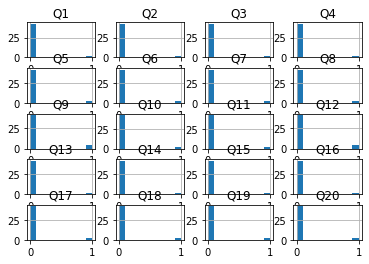

In [7]:
# histograms
df.hist()

# Coorelation Matrix


In [8]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Q1,1.000000,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Q2,-0.047619,1.000000,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Q3,-0.047619,-0.047619,1.000000,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Q4,-0.047619,-0.047619,-0.047619,1.000000,-0.047619,-0.047619,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Q5,-0.047619,-0.047619,-0.047619,-0.047619,1.000000,-0.047619,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Q6,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,1.000000,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Q7,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,1.000000,-0.047619,-0.069007,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Q8,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,1.000000,-0.069007,-0.047619,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619
Q9,-0.069007,-0.069007,-0.069007,-0.069007,-0.069007,-0.069007,-0.069007,-0.069007,1.000000,-0.069007,-0.069007,-0.100000,-0.069007,-0.069007,-0.069007,-0.069007,-0.069007,-0.069007,-0.069007,-0.069007
Q10,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.069007,1.000000,-0.047619,-0.069007,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619,-0.047619


<AxesSubplot:>

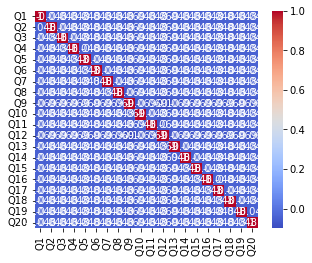

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Model Training

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Output'])
Y = df['Output']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
# model training
model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [12]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  88.88888888888889


In [13]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
#     print(prepared_df)
    y_pred = model.predict(df)
    return y_pred
    

In [14]:
config = {
    'Q1': [1],
    'Q2': [0],
    'Q3': [0],
    'Q4': [0],
    'Q5': [0],
    'Q6': [0],
    'Q7': [0],
    'Q8': [0],
    'Q9': [0],
    'Q10': [0],
    'Q11': [0],
    'Q12': [0],
    'Q13': [0],
    'Q14': [0],
    'Q15': [0],
    'Q16': [0],
    'Q17': [0],
    'Q18': [0],
    'Q19': [0],
    'Q20': [0],
}

predict_mpg(config, model)

array(['PowderyMildew'], dtype=object)

# Create Model File

In [19]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 88.89 %


In [20]:
##loading the model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(config, model)

array(['PowderyMildew'], dtype=object)